In [2]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


In [3]:
import matplotlib.pyplot as plt

# Set default figure size
plt.rcParams['figure.figsize'] = (3, 2)  # width, height in inches

# Set default font sizes
plt.rcParams['font.size'] = 10  # Default font size
plt.rcParams['axes.titlesize'] = 10  # Title font size
plt.rcParams['axes.labelsize'] = 10  # Label font size
plt.rcParams['xtick.labelsize'] = 10  # x-axis tick label font size
plt.rcParams['ytick.labelsize'] = 10  # y-axis tick label font size
plt.rcParams['legend.fontsize'] = 8  # Legend font size
mpl.rcParams['image.cmap'] = 'viridis'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [4]:
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'

In [5]:

figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/figure_introductory_sequence'
misc.get_or_create_subdir(figdir)
data_dir = '/mnt/home/szheng/ceph/place_variability/data/paper'
misc.get_or_create_subdir(data_dir)


/mnt/home/szheng/ceph/place_variability/fig/paper/figure_introductory_sequence
/mnt/home/szheng/ceph/place_variability/data/paper


'/mnt/home/szheng/ceph/place_variability/data/paper'

In [6]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

import preprocess_one_session as prepos

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [7]:
fn = 'prepped_data_agg.p'
fn_full = os.path.join(data_dir,fn)
prepped_data_agg = pickle.load(open(fn_full,'rb'))

all_fields_recombined_all = prepped_data_agg['all_fields_recombined_all']
pf_params_recombined_all=  prepped_data_agg['pf_params_recombined_all']
fr_map_trial_df_all= prepped_data_agg['fr_map_trial_df_all']
occu_map_all = prepped_data_agg['occu_map_all']
fr_map_all = prepped_data_agg['fr_map_all']

pval_all = prepped_data_agg['pval_all']
X_pwc_all = prepped_data_agg['X_pwc_all']
X_raw_all = prepped_data_agg['X_raw_all']
changes_df_all = prepped_data_agg['changes_df_all']
var_res_all_test = prepped_data_agg['var_res_all']
# corr_all = prepped_data_agg['corr_all']
all_sw_d_all = prepped_data_agg['all_sw_d_all']
all_sw_with_metrics_d_all = prepped_data_agg['all_sw_with_metrics_d_all']
best_n_all_test = prepped_data_agg['best_n_all']
spk_beh_df_all = prepped_data_agg['spk_beh_df_all']

# pf_params_all = prepped_data_agg['pf_params_all']
# all_fields_all = prepped_data_agg['all_fields_all']

ntrials_per_tt=fr_map_trial_df_all.groupby(level=(0,1,2,3)).apply(lambda x:x.dropna(axis=1,how='all').shape[1])
ntrials_mask = ntrials_per_tt.groupby(level=(0,1,2)).apply(lambda x:(x>=7).all()) 

trial_index_to_index_within_df_all=prepped_data_agg['trial_index_to_index_within_df_all']


In [8]:
savefn_full = os.path.join(data_dir,'per_field_metrics_shtest_with_1cp.p')
# pickle.dump(per_field_metrics_all,open(savefn_full,'wb'))
per_field_metrics_all=pickle.load(open(savefn_full,'rb'))

In [9]:
ani = 'e13_26m1'#'e15_13f1'
sess='e13_26m1_210913'#'e15_13f1_220117'#

In [10]:
eps = 1e-10
ta,tt = 0,0
fr_map_trial_df_one = fr_map_trial_df_all.loc[(ani,sess,ta,tt),:].unstack(level=-1)
fr_map_trial_df_one = fr_map_trial_df_one / (fr_map_trial_df_one.max(axis=1).values[:,None]+eps)


/tmp/ipykernel_1035657/1423401187.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_trial_df_one = fr_map_trial_df_all.loc[(ani,sess,ta,tt),:].unstack(level=-1)


In [11]:
# use the peak location from one trial
peak_loc_one=pf_params_recombined_all.loc[ani,sess,'peak',ta].loc[[tt,'both'],:][1]

/tmp/ipykernel_1035657/1155518548.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  peak_loc_one=pf_params_recombined_all.loc[ani,sess,'peak',ta].loc[[tt,'both'],:][1]


In [12]:
# select by spatial inforamtion
si_thresh = 1
per_field_metrics_one=per_field_metrics_all.loc[ani,sess,ta,tt]
si_uid_l=per_field_metrics_one.index[per_field_metrics_one['si'] > si_thresh].get_level_values(0).unique()

/tmp/ipykernel_1035657/3058532475.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  per_field_metrics_one=per_field_metrics_all.loc[ani,sess,ta,tt]


In [18]:
per_field_metrics_one.index.get_level_values(0).nunique()

264

In [16]:
si_uid_l.shape

(114,)

In [13]:

all_fields_one=all_fields_recombined_all.loc[(ani,sess,ta),:].loc[[tt,'both'],:].loc[(slice(None),si_uid_l),:]
# all_fields_one_sample=all_fields_recombined_all.loc[(ani,sess,ta),:].loc[[tt,'both'],:].loc[(slice(None),si_uid_l),:].sample(70,random_state=0)
all_fields_one_sample=all_fields_one



/tmp/ipykernel_1035657/3429749769.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields_one=all_fields_recombined_all.loc[(ani,sess,ta),:].loc[[tt,'both'],:].loc[(slice(None),si_uid_l),:]


### examples selected 
for e13_26m1_210913

one field pop up 0,198; 0,334

one field pop down 0,442

one down then up 0,414

one up one no sw 0,123

no sw 0,177,0


In [14]:
# tt_uid_to_include = [(0,198),(0,442),(0,414),(0,123),(0,177)]
tt_uid_to_include = [(0,198),(0,177),(0,442)]

In [15]:
all_sw_one=all_sw_with_metrics_d_all.loc[ani,sess,ta].query('(trialtype==@tt) | (trialtype=="both")')

/tmp/ipykernel_1035657/2606981784.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_one=all_sw_with_metrics_d_all.loc[ani,sess,ta].query('(trialtype==@tt) | (trialtype=="both")')


### ==for manually selecting examples, skip in final plotting==

In [654]:
 
# switching_field_inds=all_sw_with_metrics_d_all.loc[ani,sess,ta].set_index(['trialtype','uid','field_index']).index
gpb=all_sw_one.groupby(['trialtype','uid','field_index'])
first_off_then_on_inds=[]
just_on_inds = []
just_off_inds = []
for k,val in gpb:
    if len(val)==2:
        if val.iloc[0]['switch']==-1 and val.iloc[1]['switch']==1:
            first_off_then_on_inds.append(k)
    if len(val)==1:
        if val.iloc[0]['switch']==1:
            just_on_inds.append(k)
        elif val.iloc[0]['switch']==-1:
            just_off_inds.append(k)

best_n_one=best_n_all_test.loc[ani,sess,ta].loc[[tt,'both']]
nosw_inds=best_n_one.index[best_n_one==0]



/tmp/ipykernel_1028004/1026823459.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  best_n_one=best_n_all_test.loc[ani,sess,ta].loc[[tt,'both']]


In [599]:
ii=-2
# tt_selected,uid,field_id=all_fields_one.index.intersection(switching_field_inds)[ii]

# tt_selected,uid,field_id = all_fields_one.index.intersection(first_off_then_on_inds)[ii]
tt_selected,uid,field_id = all_fields_one.index.intersection(just_on_inds)[ii]
# tt_selected,uid,field_id = all_fields_one.index.intersection(just_off_inds)[ii]
# tt_selected,uid,field_id = all_fields_one.index.intersection(nosw_inds)[ii]

print(tt_selected,uid,field_id)

both 443 0


/tmp/ipykernel_1028004/402569645.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  frmap_one=fr_map_trial_df_all.loc[ani,sess,ta,tt,uid].dropna(axis=1,how='all').T


(<Figure size 432x288 with 2 Axes>, <Axes: xlabel='Position'>)

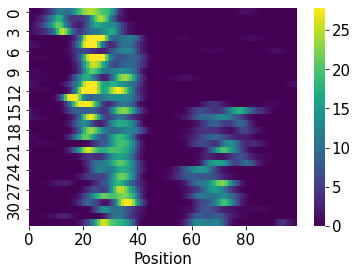

In [615]:
uid=123
frmap_one=fr_map_trial_df_all.loc[ani,sess,ta,tt,uid].dropna(axis=1,how='all').T
ph.heatmap(frmap_one)


### ==manual selection ends==

In [16]:
# add selected examples back in 
tt_uid_ind_all_fields_one_sample=pd.MultiIndex.from_frame(all_fields_one_sample.reset_index(level=(0,1))[['level_0','level_1']])
rows_to_add = []
for tt,uid in tt_uid_to_include:
    if (tt,uid) not in tt_uid_ind_all_fields_one_sample:
        rows_to_add.append(all_fields_one.loc[([tt],[uid]),:])
if len(rows_to_add) >0:
    rows_to_add = pd.concat(rows_to_add,axis=0)
    all_fields_one_sample_combined =  pd.concat([all_fields_one_sample,rows_to_add],axis=0)
else:
    all_fields_one_sample_combined = all_fields_one_sample

In [17]:
# sort uid
# gpb=all_fields_one_sample.groupby(level=1)
gpb = all_fields_one_sample_combined.groupby(level=1) # uid level
all_fields_one_for_sort=[]
for k,val in gpb:
#     pre_t=val['peak'] < 33
#     if pre_t.sum()>0:
#         all_fields_one_for_sort.append(val.loc[pre_t].iloc[0])
#     else:        
    ii=np.argmax(val['fr_peak'].values)
#     ii=0
    all_fields_one_for_sort.append(val.iloc[ii])
all_fields_one_for_sort = pd.concat(all_fields_one_for_sort,axis=1).T
# uid_sorted=all_fields_one_for_sort['peak'].sort_values().index.get_level_values(1).unique()
uid_sorted=peak_loc_one.loc[all_fields_one_for_sort.index].sort_values().index.get_level_values(1).unique()



In [18]:
row_ind_ex = []
field_bound_ex= []
for tt, uid in tt_uid_to_include:
    row_ind=np.nonzero(uid_sorted == uid)[0][0]
    row_ind_ex.append(row_ind)
    field_bound_ex.append(all_fields_one.loc[tt,uid,0][['start','end']].values)


In [19]:

import matplotlib.patches as patches

In [42]:
all_fields_one.loc[tt,]

start end com peak    fr_peak    fr_mean  \
         field_index                                            
0.0  3   0              24  40  32   32   2.327171   1.246869   
     31  0              71  88  80   81   7.563973   4.557867   
     57  0               5   9   7    7   4.605284   4.455142   
         1              84  99  92   93  21.796946  13.591186   
     121 0               1  11   6    7   5.967633    4.68339   
...                    ...  ..  ..  ...        ...        ...   
both 261 0              27  33  30   30   3.693489   3.005902   
     301 0              11  20  15   15   8.278828   6.305192   
     387 0               0  22  13   15    7.04149    3.25166   
     443 0               5  23  15   16  13.264791   7.015054   
     448 0               9  27  18   19  10.979548   6.360062   

                      other_field_index  
         field_index                     
0.0  3   0                          NaN  
     31  0                          NaN  
     57  0                          NaN  
         1                          NaN  
     121 0                          NaN  
...                                 ...  
both 261 0                          0.0  
     301 0                          0.0  
     387 0                          0.0  
     443 0                          0.0  
     448 0                          0.0  

[143 rows x 7 columns]

In [73]:
row_ind_ex

[3, 67, 93]

/mnt/home/szheng/projects/util_code/plot_helper.py:626: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick_labels, rotation=0)


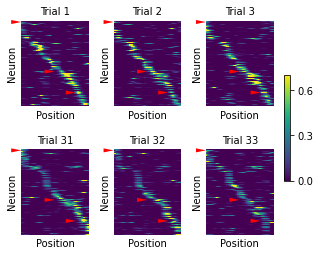

In [20]:

# tr_l = [0,1,2,3,7,8,20,30,32]
tr_l = [0,1,2,30,31,32]
# tr_l = np.arange(0,33,5)
nplots=len(tr_l)
# fig,axs=ph.subplots_wrapper(nplots)
fig,axs=plt.subplots(2,3,figsize=(4,3.66))

for ii,tr in enumerate(tr_l):
#     ax=axs[ii]
    ax=axs.ravel()[ii]
#     fig,ax=plt.subplots(figsize=(1.4,1.4))
    ax.set_title(f'Trial {tr+1}') # make 1 indexed!!
    fr_map_trial_df_one_trial = fr_map_trial_df_one[tr]
    mat=fr_map_trial_df_one_trial.loc[uid_sorted]
    ph.heatmap(mat,fig=fig,ax=ax,vmax=0.7,cbar=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel('Neuron')
    
    for row_to_highlight,field_bound in zip(row_ind_ex,field_bound_ex):
        x_text = field_bound[0]-0.5  # x position of the text (to the left of the heatmap)
        y_text = row_to_highlight + 0.5  # y position of the text (same as the row)

        # Annotate with an arrow pointing at a specific cell
        ax.annotate('', xy=(x_text+0.5, y_text),  # Pointing to 
                    xytext=(x_text, y_text),  # Position of text
                    arrowprops=dict(facecolor='red',edgecolor='none',headwidth=4.,headlength=10., shrink=0.05),  # Arrow properties
                    color='white',  # Text color
                    ha='right')  # Horizontal alignment of the text

#         columns_to_highlight = field_bound
#         ellipse_center = (np.mean(columns_to_highlight), row_to_highlight)  # Center of the ellipse
#         ellipse_width = (columns_to_highlight[1]-columns_to_highlight[0]) * 1.1  # Cover the columns, adjust as necessary
#         ellipse_height = 1  # Height to just cover the row, adjust for aesthetics

#         # Create an Ellipse patch
#         oval = patches.Ellipse(ellipse_center, width=ellipse_width, height=ellipse_height,
#                                edgecolor='red', facecolor='none', lw=0.5)
#         ax.add_patch(oval)
#     cbar=ax.collections[0].colorbar
#     cbar.set_ticks([0,0.6])

#     if tr not in [2,32]:
#         cbar.remove()

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Adjust as needed
cbar_ax = fig.add_axes([1., 0.3, 0.02, 0.4])  # Adjust the dimensions [left, bottom, width, height] to fit your layout

# Draw the colorbar
cbar=fig.colorbar(axs[0,0].collections[0], cax=cbar_ax)
cbar.set_ticks([0,0.3,0.6])



figfn = f'population_sequence_across_trials_index_within'
ph.save_given_name(fig,figfn,figdir,dpi=900)


/tmp/ipykernel_1035657/1818773802.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  frmap_one=fr_map_trial_df_all.loc[ani,sess,ta,tt,uid].dropna(axis=1,how='all').T


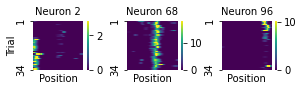

In [23]:
nplots = len(tt_uid_to_include)
# fig,axs=plt.subplots(1,nplots,figsize=(nplots*3,2))
fig,axs=plt.subplots(1,nplots,figsize=(4.5,0.9))
plt.subplots_adjust(wspace=0.5)
for ii,(_,uid) in enumerate(tt_uid_to_include):        
    ax=axs.ravel()[ii]
#     fig,ax=plt.subplots(figsize=(1.6,1))
    frmap_one=fr_map_trial_df_all.loc[ani,sess,ta,tt,uid].dropna(axis=1,how='all').T
    ph.heatmap(frmap_one,fig=fig,ax=ax)
    ax.set_yticks([0,frmap_one.shape[0]])
    ax.set_yticklabels([1,1+frmap_one.shape[0]]) # make 1-indexed
#     ax.set_title(f'Neuron {uid}({row_ind_ex[ii]})')
    ax.set_title(f'Neuron {row_ind_ex[ii]+1}') # make 1-indexed
    ax.set_xticks([])
    figfn = f'example_ratemaps_{sess}_{ta}_{tt}_{uid}'
    if ii==0:
        ax.set_ylabel('Trial',labelpad=-1)
#     ph.save_given_name(fig,figfn,figdir)
# plt.tight_layout()


figfn = 'example_ratemaps'
ph.save_given_name(fig,figfn,figdir)

Int64Index([341, 300, 258, 448, 148, 150, 220, 270, 392, 334], dtype='int64')

In [63]:
db_sorted = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
ii=0
data_dir_full = db_sorted['data_dir_full'][ii]
ani = db_sorted.index[ii][0]#'e15_13f1'#'e13_26m1'
sess=db_sorted['sess_name'][ii]#'e15_13f1_220117'#'e13_26m1_210913'
print(sess)

e13_26m1_210913


In [64]:
# load data
mat_to_return=prep.load_stuff(data_dir_full)
# sessionPulses=mat_to_return['sessionPulses']
# filtered = mat_to_return['filtered']
behavior=mat_to_return['behavior']
ripples = mat_to_return['ripples']
sleep_state_episodes = mat_to_return['SleepStateEpisodes']
cell_metrics=mat_to_return['cell_metrics']
mergepoints = mat_to_return['mergepoints']
cell_type_mask = mat_to_return['cell_type_mask']
res_all_epochs_d, ripple_time_ints_epochs_d = prep.get_spike_count_rate_participation_in_ripple_all(cell_metrics,
                                                                                                    ripples,
                                                                                                    mergepoints,
                                                                                                   )


prep_res = dpp.load_spk_beh_df(data_dir_full,force_reload=False,extra_load={})
spk_beh_df=prep_res['spk_beh_df']
_,spk_beh_df=dpp.group_into_trialtype(spk_beh_df)
cell_cols_d = prep_res['cell_cols_d']
# beh_df = prep_res['beh_df']
# beh_df_d,beh_df=dpp.group_into_trialtype(beh_df)
spike_trains = prep_res['spike_trains']

In [81]:
import pynapple as nap

In [84]:
trial_int = nap.IntervalSet(start=behavior['trials']['startPoint'][0,0],end=behavior['trials']['startPoint'][0,1])


In [87]:
spike_trains_pyr=spike_trains.getby_category('ispyr')[True]

In [90]:
spike_trains_pyr_tr = spike_trains_pyr.restrict(trial_int)

In [96]:
spike_trains_pyr_tr_flatten=spike_trains_pyr_tr.values()

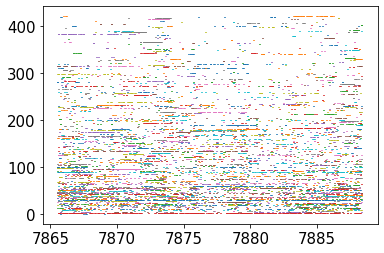

In [102]:
fig,ax=plt.subplots()
for i,times in enumerate(spike_trains_pyr_tr_flatten):
    ax.scatter(times.index,len(times.index)*[i],marker='|',s=1.,)

In [92]:
spike_trains_pyr_tr_flatten = spike_trains_pyr_tr.to_tsd("order") 

AttributeError: 'TsGroup' object has no attribute 'to_tsd'

In [24]:
(fr_map_trial_df_one.columns[None,:] * fr_map_trial_df_one.values)

/tmp/ipykernel_634459/3678779601.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  (fr_map_trial_df_one.columns[None,:] * fr_map_trial_df_one.values)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.19007334, 2.51055864, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01991616, 0.08695659, ..., 0.        , 0.        ,
        0.        ]])

In [23]:
com.

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03968302, 0.08371463, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00010832, 0.00047296, ..., 0.        , 0.        ,
        0.        ]])

In [9]:
import variability_axis as va
per_neuron_metrics_all = va.get_per_neuron_metrics(spk_beh_df_all,fr_map_trial_df_all,fr_map_all=fr_map_all,occu_map_all=occu_map_all)
is_place_cell = per_neuron_metrics_all.index.isin(all_fields_recombined_all.reset_index(-1).index)
per_neuron_metrics_all['is_pc']=is_place_cell
                                                
                                                

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/mnt/home/szheng/projects/place_variability/code/variability_axis.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  cell_cols = fr_map_trial_df_all.loc[k,:].index.get_level_values(2).unique()
/mnt/home/szheng/projects/place_variability/code/variability_axis.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  cell_cols = fr_map_trial_df_all.loc[k,:].index.get_level_values(2).unique()
/mnt/home/szheng/projects/place_variability/code/variability_axis.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  cell_cols = fr_map_trial_df_all.loc[k,:].index.get_level_values(2).unique()
/mnt/home/szheng/projects/place_variability/code/variability_axis.py:41: PerformanceWarning: indexing past lexsort depth may i

/mnt/home/szheng/projects/place_variability/code/variability_axis.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  cell_cols = fr_map_trial_df_all.loc[k,:].index.get_level_values(2).unique()
/mnt/home/szheng/projects/place_variability/code/variability_axis.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  cell_cols = fr_map_trial_df_all.loc[k,:].index.get_level_values(2).unique()
/mnt/home/szheng/projects/place_variability/code/variability_axis.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  cell_cols = fr_map_trial_df_all.loc[k,:].index.get_level_values(2).unique()
/mnt/home/szheng/projects/place_variability/code/variability_axis.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  cell_cols = fr_map_trial_df_all.loc[k,:].index.get_level_values(2).unique()
/mnt/home/szheng/projects/place_variability/code/variability_axis.py:41: PerformanceWarning: indexing past l